KG 1 : https://zzaebok.github.io/knowledge_graph/recommender_system/KG_recommend/
<br/><br/>
기존의 Collaborative filtering, Content-Based filtering 기반이 추천시스템은 각 entity가 가진 items, 그리고 entity 간의 관계를 동시에 고려하는 것이 아니라 따로따로 고려한다는 단점이 있다.(cf-based는 entity 간 관계에만 집중하고, content-based는 entity가 가진 items에만 집중한다)
<br/><br/>
이를 해결하기 위한 것이 지식그래프 : Knowledge Graph<br/>
지식 그래프에서는 entity와 entity의 items(=attributes)가 'node'로 구성된다. 그리고 entity와 items 간의 관계를 'edge'로 나타낸다. entity와 entity 간에도 edge로 연결된다.<br/>
( e.g. 김치찌개는 맵다 >> node(김치찌개) - edge(has_taste) - node(매운 맛) )<br/>
<br/>
KG 구현 방법은 다양한다. 
1. Embedding based method <br/>
KG는 head(entity, node)-relation(edge)-tail(entity, node)와 같이 "triple"로 표현된다.<br/>
이는 곧, head벡터와 tail벡터가 벡터공간 상에 존재하고, relation이 이 둘 사이의 거리를 나타낸다고 할 수 있다. >> 따라서 모델에 head와 tail을 embedding하여 입력하면 relation을 계산한다.<br/>
각각의 items는 entity에 대해 comprehensive representation (=hidden vector) 를 갖게 된다. <br/>
예측 시, 입력값들에 대한 hidden vector를 계산하고 이를 통해 score function(attention function과 같은 의미)을 계산하여 입력값 간의 유사성을 추론한다.

2. Path based method<br/>
직관적으로 KG그래프를 경로화하여 나타낸 것인데, 딥러닝과 결합할 수 있다.<br/>
path는 순서를 가진 일련의 과정이므로 이는 sequence 데이터로 볼 수 있다. >> sequence 데이터를 분석하는 딥러닝 모델들을 그대로 사용 가능하다. <br/>
LSTM을 예로 들면, LSTM의 인풋으로 path node를 입력하면 된다.

<br/>
<span style='color:green'>추천 논문 : KGCN 모델 ( https://arxiv.org/abs/1904.12575 )</span><br/>

<hr/>
KG 2 : https://zzaebok.github.io/machine_learning/knowledge_graph/kge/
<br/><br/>
🔸KG Embedding : How to embed entities and relations maintaining the structural infos of them not randomly.<br/>
(관련 논문 : Knowledge Graph Embedding: A Survey of Approaches and Applications ) <br/>
다음과 같은 3가지 요소에 집중하며 각 entity와 relation을 임베딩하면 된다.
1. Representation of entities and relations : entity와 relation을 벡터 또는 행렬로 표현할 수 있다.
2. Scoring function : score와 loss는 음이 상관관계를 갖는다. 어떤 종류의 score function을 사용할지 정해야 한다.
3. Learning method : word2vec에서는 계산량을 줄이기 위해 negative sampling을 통해 학습을 진행한다. KGE도 마찬가지로 최적화를 위한 학습 방법이 필요할 수 있다.

<br/>







### Translation Distance Method
- scoring function : distance-based 기반의 scoring function을 이용한다.

##### 1. TransE
- scoring function : $f_r(h,t)=-||h+r-t||_{1/2}$ <br/>
의미 : h와 t 벡터 사이의 거리 r 벡터가 최소화될수록 score는 최대가 된다. 따라서 h와 t가 가깝게 위치하도록 임베딩된다.<br/>
단점 : 1대 N 관계에 취약하다. 즉 하나의 head entity가 여러 tail entity를 갖는 상황에 취약. 이는 head entity와 하나의 relation이 하나의 tail밖에 갖지 못함을 의미한다. (<span style='color:green'>e.g. h=봉준호, r=directorOf, t=기생충,설국열차 이지만 TransE를 사용하면 기생충과 설국열차는 똑같은 벡터로 임베딩되는 문제가 발생</span>). TransH가 일대다 관계를 개선한 모델

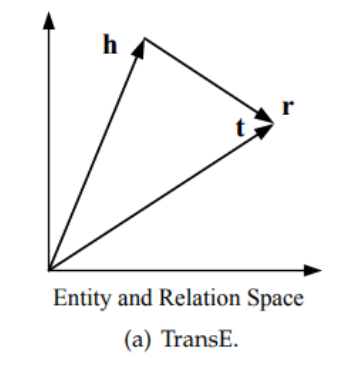

##### 2. TransH
- scoring function : $f_r(h,t)=-||h_{\perp}+r-t_{\perp}||_{2}^2$ <br/>
($h_\perp = h - w_r^Thw_r ~~~,~~~ t_\perp = t - w_r^Ttw_r$)

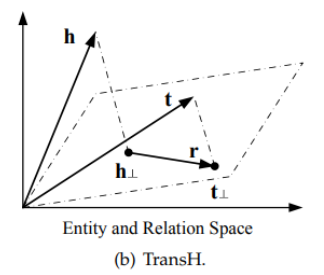